# Introduction

The exponential growth in internet usage has led to the rapid rise of online shopping, also known as e-commerce. Total revenue from online sales is expected to hit US $2.7 trillion in 2021 with market penetration of 50.8% and compound annual growth rate (CAGR) of ~6% for the next 5 years. Many e-commerce platforms have become household names worldwide, such as Amazon, Alibaba, Mercadolibre and Zalando among others, whilst numerous traditional brick-and-mortar retailers have also shifted to an omni-channel approach. As such, understanding the behaviour and intention of online customers have become increasingly important for retailers in order to allow for more effective marketing and customer service, with the ultimate goal of boosting sales. For instance, such information could be used to determine what type of content should be offered to prospective buyers, or to keep track of relevant users  and suggest offers which will induce potential return visits that results in purchases. 

Meanwhile, the challenge faced in understanding and predicting online shopper behaviour stems from the fact that there is generally no individual interaction between the buyers and sellers. Historically, the approach would be simply to conduct indiscriminate marketing and provide a uniform customer experience. Alternatively, users could be directly surveyed regarding their preferences/intention. However, the former method is wasteful and lacks the effectiveness of a customised approach, while the latter method can be disruptive to the user experience, resulting in poorer conversion rates for both cases. 

To overcome this, (near) real-time analysis of shopper intent can be performed through indirect means via the collection of data in terms of user characteristics (such as their geographical location) as well as their browsing patterns, also known as click-stream analysis. 

# Problem & Learning Task

For this project, the defined problem at hand is to train a program to learn to identify the purchasing intent of online shoppers through the real-time analysis of visitor and session information. A program is said to "learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$." For our problem, $T$, $P$ and $E$ can be defined as

- Task $T$: Helping a website predict whether visitors will make a purchase through supervised learning
- Performance Measure $P$: Percentage of visitors correctly classified, with greater priority given to accurate classification of users that make purchases  
- Training Experience $E$: A database consisting of structured (numerical and/or categorical) attributes of the session and visitor information of online users and the respective given classfications   

With that with have a fully specified learning task at hand. To complete the design of the learning system, we must now choose

1. the exact type of knowledge to be learned
2. a representation for this target knowledge

For 1, our program needs to learn how to choose the most likely outcome from two possible outcomes ('True' or 'False', repsenting whether the user ends up making a purchase). This can be expressed through an ideal target function $f$ which accepts as input any set of feature values $X$ and produces an output from the set of possible outcomes ($true$, $false$) expressed mathematically below as
<center> $f: X \mapsto (true, false)$ </center> 

Having specified this ideal target function $f$, we now need to discover an operational description that approximates $f$. To do so, we need to choose a representation (2) that the learning program will use to describe the function that it will learn, denoted as $\hat{f}$. For this project, several representations (algorithms) will be explored: Decision Trees, Instance-Based learning, Bayesian Learning, Neural Networks and Model Ensembles. Their detailed representations and mathematical expressions will be covered in greater detail in the individual sections subsequently. 

# Exploration of Dataset: Online Shoppers Purchasing Intention

## Overview

The dataset selected for this project is the Online Shoppers Purchasing dataset and has been sourced from the UCI Machine Learning Repository. It is comprised of 12,330 sessions, where each session belongs to a different user in a 1-year period and features are split into 10 numerical and 8 categorical attributes. Of which, 9 relevant attributes have been selected (4 numerical and 5 categorical) for our study.

The 'Revenue' attribute is the target attribute (Class Label).

- Class Names: indicating a revenue when True else False - 'False', 'True'
- Numerical Features (float): 'ProductRelated_Duration', 'ProductRelatedAve', 'BounceRates', 'ExitRates' 
- Categorical Features: 'SpecialDay', 'Month', 'Region', 'VisitorType', 'Weekend'

We first begin with a general look at the entire dataset, followed by a more detailed analysis of the numerical and categorical features.

In [265]:
from main import *
data_frame_os = read_data_return_frame("online_shoppers_intention.csv")
data_frame_os # General look at the dataset

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.200000,0.200000,0.0,Feb,1,Returning_Visitor,False,False
1,64.000000,32.000000,0.000000,0.100000,0.0,Feb,1,Returning_Visitor,False,False
2,0.000000,0.000000,0.200000,0.200000,0.0,Feb,9,Returning_Visitor,False,False
3,2.666667,1.333333,0.050000,0.140000,0.0,Feb,2,Returning_Visitor,False,False
4,627.500000,62.750000,0.020000,0.050000,0.0,Feb,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...
12325,1783.791667,33.656447,0.007143,0.029031,0.0,Dec,1,Returning_Visitor,True,False
12326,465.750000,93.150000,0.000000,0.021333,0.0,Nov,1,Returning_Visitor,True,False
12327,184.250000,30.708333,0.083333,0.086667,0.0,Nov,1,Returning_Visitor,True,False
12328,346.000000,23.066667,0.000000,0.021053,0.0,Nov,3,Returning_Visitor,False,False


There are no null values in the data

In [266]:
missing_value = pd.DataFrame(data_frame_os.isnull().sum(), columns = ['Null Counts'])
missing_value

,Null Counts
ProductRelated_Duration,0
ProductRelatedAve,0
BounceRates,0
ExitRates,0
SpecialDay,0
Month,0
Region,0
VisitorType,0
Weekend,0
Revenue,0


There are 531 rows of duplicate data. However, the duplicates are likely not due to error, but rather due to similar session information and browsing behaviour. As such, they are real data, and will be retained for subsequent anaylsis

In [267]:
duplicate = data_frame_os[data_frame_os.duplicated()]
duplicate

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
21,0.0,0.0,0.2,0.2,0.0,Feb,1,Returning_Visitor,False,False
56,0.0,0.0,0.2,0.2,0.6,Feb,3,Returning_Visitor,False,False
64,0.0,0.0,0.2,0.2,0.0,Feb,4,Returning_Visitor,False,False
70,0.0,0.0,0.2,0.2,0.0,Feb,1,Returning_Visitor,False,False
85,0.0,0.0,0.2,0.2,0.0,Feb,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...
12197,0.0,0.0,0.2,0.2,0.0,Nov,1,Returning_Visitor,False,False
12200,0.0,0.0,0.2,0.2,0.0,Dec,6,Returning_Visitor,True,False
12220,0.0,0.0,0.2,0.2,0.0,Nov,1,Returning_Visitor,False,False
12301,0.0,0.0,0.2,0.2,0.0,Nov,4,Returning_Visitor,False,False


## Numerical (Float) Features

"**Product Related Duration**" and "**Product Related Average**" represent the total and average time spent in each of the product related page categories visited by the visitor in a session respectively. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "**Bounce Rate**" and "**Exit Rate**" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

In [268]:
# Generate a descriptive table of the numerical features 

from scipy.stats import describe

numerical_features = data_frame_os[['ProductRelated_Duration', 'ProductRelatedAve', 'BounceRates', 'ExitRates']]
stats = numerical_features.describe()
stats.loc['var'] = numerical_features.var().tolist()
stats.loc['skew'] = numerical_features.skew().tolist()
stats.loc['kurt'] = numerical_features.kurtosis().tolist()
stats.round(decimals=3)

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates
count,12330.000,12330.000,12330.000,12330.000
mean,1194.746,37.634,0.022,0.043
std,1913.669,44.768,0.048,0.049
min,0.000,0.000,0.000,0.000
25%,184.138,17.613,0.000,0.014
50%,598.937,28.878,0.003,0.025
75%,1464.157,45.084,0.017,0.050
max,63973.522,1411.000,0.200,0.200
var,3662130.143,2004.166,0.002,0.002
skew,7.263,10.295,2.948,2.149


### Skew

As can be seen from the density plots of each feature below, the features 'Product Related Duration' and 'Product Related Average' seem to follow a gaussian distribution which is positively skewed, whilst the 'BounceRates' and 'Exit Rates' seem to follow a bimodal distribution with peaks at values 0 and 0.2 respectively. 

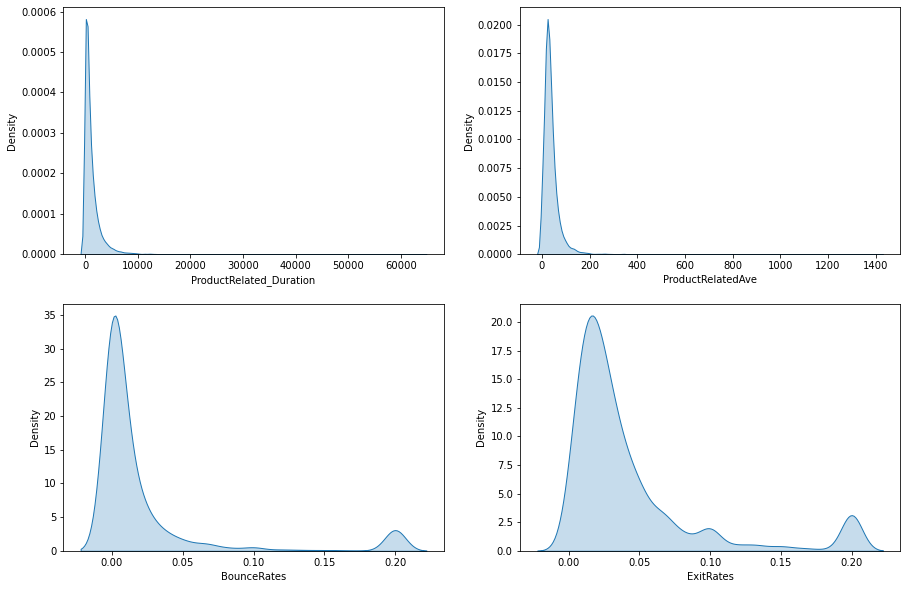

In [269]:
features = numerical_features.columns.tolist()

plt.figure(figsize=(15, 10))

for indx, var  in enumerate(features):
    plt.subplot(2, 2, indx+1)
    sns.kdeplot(numerical_features[var],shade=True)

Positive skew is an issue as this may violate certain model assumptions (e.g. Gaussian Naive Bayes, although other models like SVM and Decision Trees are more resilient to skewed features) and may also impair the interpretation of feature importance. To mitigate the issue, the numerical features have been transformed using various methods, and the respective skew of each transformation has been calculated below to determine the effectiveness of each method. As can be seen, the Box Cox transformation is the most effective, and plotted below are the new density plots after the transformation has been applied. 

*The Box Cox transformation estimates the value $\lambda$ (-5 to 5) for each variable that maximizes the normality of the data using the equation below 

<center> $y (\lambda) = \frac{y^\lambda -1}{\lambda}$ when $\lambda \neq 0$ or $log(y)$ when $\lambda = 0$ </center>

In [270]:
from scipy import stats

data = {}
plot = []

for var in features:
    skew = numerical_features[var].skew()
    data[var] = [skew]
    # Log transformation
    var_log = np.log(numerical_features[var] + 1) # Add 1 here to deal with 0 values (log0 = undefined, log1 =0)
    log_skew = var_log.skew()
    data[var].append(log_skew)
    # Square root transformation
    var_log = np.sqrt(numerical_features[var])
    sqrrt_skew = var_log.skew()
    data[var].append(sqrrt_skew)
    # Box-Cox Transformation
    var_boxcox = stats.boxcox(numerical_features[var] + 0.0001)[0] # As data must be positive
    boxcox_skew = pd.Series(var_boxcox).skew()
    data[var].append(boxcox_skew)
    plot.append(var_boxcox)

df = pd.DataFrame(data, index = ['skew', 'log skew', 'sqrt skew', 'box-cox skew']).round(decimals=3)
df


,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates
skew,7.263,10.295,2.948,2.149
log skew,-1.421,-1.440,2.878,2.055
sqrt skew,1.394,1.298,1.681,1.208
box-cox skew,-0.238,-0.065,0.086,0.053


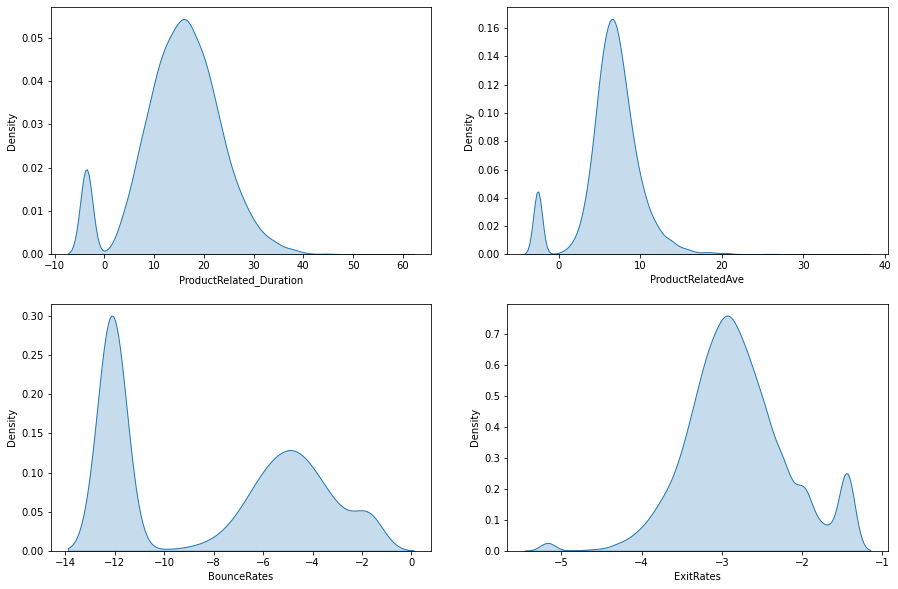

In [271]:
plot_df = pd.DataFrame(plot, index = features)
plot_df = plot_df.T
plt.figure(figsize=(15, 10))

for indx, var  in enumerate(plot_df):
    plt.subplot(2, 2, indx+1)
    sns.kdeplot(plot_df[var],shade=True)

### Outliers

The following violin/boxplots allow us to identify the outliers within the numerical attributes. Outliers could be caused by measurement errors or are possibly true outliers. For our data, the latter case is more likely. Detection of outliers is importantly as they can result in a poorer fit and consequently modelling performance. 

As seen, 'Product Related Duration' and 'Product Related Average' have extremely large positive outliers. To set a threshold for identification of outliers, three standard deviations from the mean have been used as the cut-off point. 219 and 138 outliers have been identified from 'Product Related Duration' and 'Product Related Average' respectively.

'Bounce Rates' and 'Exit Rates' have been omitted from the analysis as the majority of values fall at either extreme (0, 0.2).

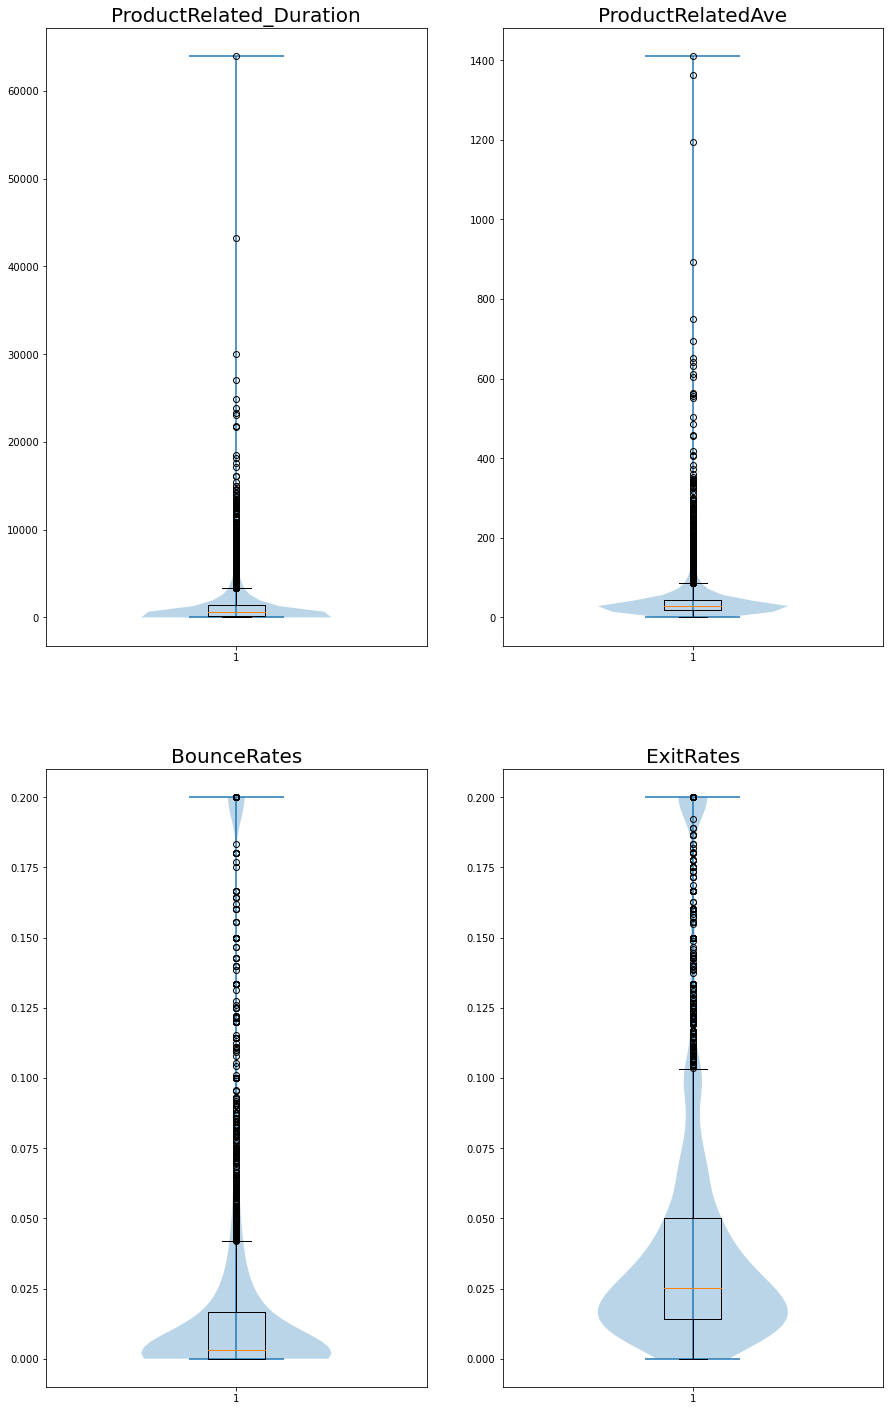

In [272]:
plt.figure(figsize=(15, 25))
plt.tight_layout()

for indx, var  in enumerate(features):
    plt.subplot(2, 2, indx+1)
    plt.violinplot(numerical_features[var])
    plt.boxplot(numerical_features[var])
    plt.gca().set_title(var, fontsize=20)

In [282]:
from numpy import std
num_feat = numerical_features.copy()
for var in ['ProductRelated_Duration', 'ProductRelatedAve']:
    # calculate summary statistics
    data_mean, data_std = mean(num_feat[var]), std(num_feat[var])
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(var)
    # identify outliers
    outliers = [x for x in num_feat[var] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in num_feat[var] if x > lower and x < upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    num_feat = num_feat[(num_feat[var] > lower) & (num_feat[var] < upper)]
    print('--------')

ProductRelated_Duration
Identified outliers: 219
Non-outlier observations: 12111
--------
ProductRelatedAve
Identified outliers: 138
Non-outlier observations: 11973
--------


## Categorical Features

The "**Special Day**" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. This variable can take on values between 0-1 in increments of 0.2. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes **region**, **visitor type** as returning or new visitor, a Boolean value indicating whether the date of the visit is **weekend**, and **month** of the year.

In [274]:
categorical_df = data_frame_os[['SpecialDay', 'Month', 'Region', 'VisitorType', 'Weekend']]

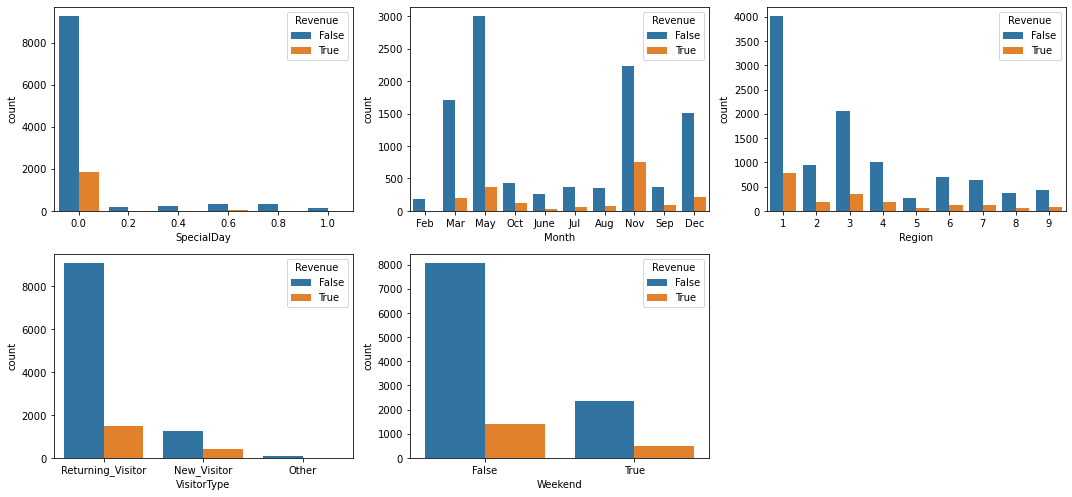

In [275]:
def count_plot(df, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(3, 3, indx+1)
        g = sns.countplot(df[var], hue= df['Revenue'])
    plt.tight_layout()

categorical_features = ['SpecialDay', 'Month', 'Region', 'VisitorType', 'Weekend']
import warnings
warnings.filterwarnings('ignore')
count_plot(data_frame_os, categorical_features) # Plot the categorical features

## Correlation (Association)

The correlation between all the features and target variable have been plotted in the matrix below. 
- *Pearson's R* has been used to calculate the correlation between continuous-continuous variables. 
- For categorical variables, as we are unable to use Pearson's R, the measure of association chosen is *Theil's U* (Uncertainty Coefficient), which is based on the conditional entropy between features. 
- The *Correlation ratio* is used for categorical-continuous cases, which can be understood as the weighted variance of the mean of each category divided by the variance of all samples. 

For all measures of correlation, the output value lies within the range [0,1], and as such the use of this uniform measure of output allows for the measure of association/correlation to be compared and contrasted for all the features in our dataset. 

In [ ]:
pip install dython
from dython.nominal import associations

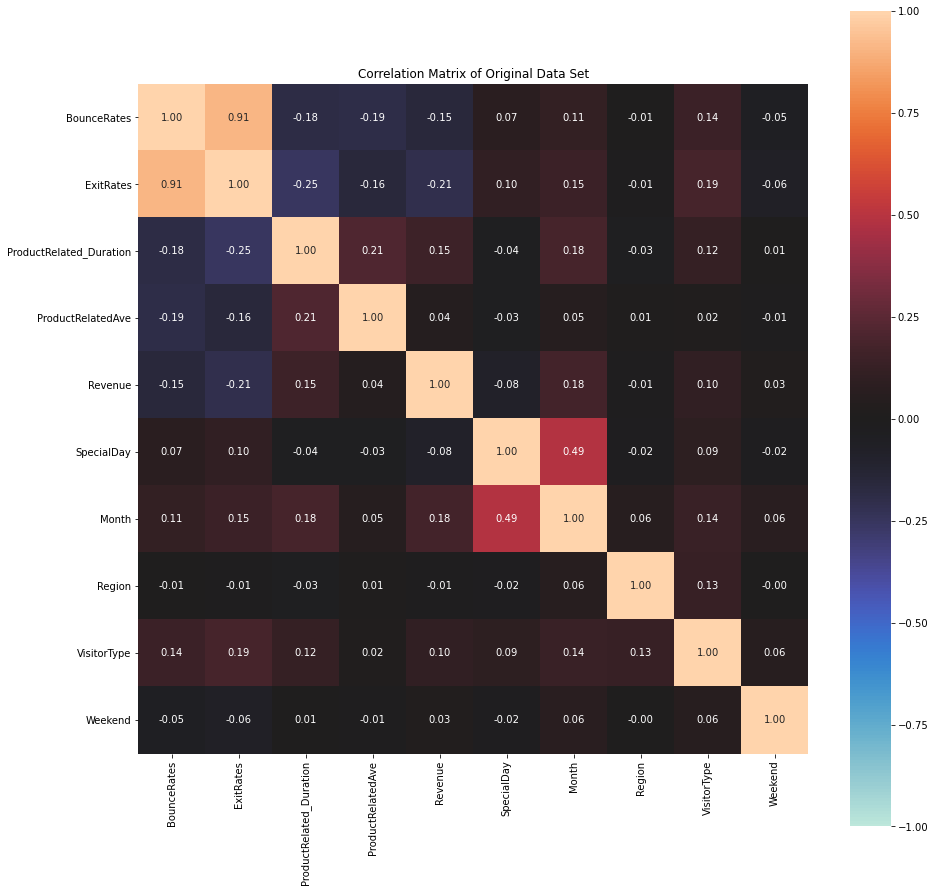

{'corr':                          BounceRates  ExitRates  ProductRelated_Duration  \
 BounceRates                 1.000000   0.913004                -0.184541   
 ExitRates                   0.913004   1.000000                -0.251984   
 ProductRelated_Duration    -0.184541  -0.251984                 1.000000   
 ProductRelatedAve          -0.187759  -0.155736                 0.210954   
 Revenue                    -0.150673  -0.207071                 0.152373   
 SpecialDay                  0.072702   0.102242                -0.036380   
 Month                       0.114721   0.147466                 0.182270   
 Region                     -0.006485  -0.008907                -0.033091   
 VisitorType                 0.141317   0.186119                 0.120521   
 Weekend                    -0.046514  -0.062587                 0.007311   
 
                          ProductRelatedAve   Revenue  SpecialDay     Month  \
 BounceRates                      -0.187759 -0.150673    0.07270

In [276]:
associations(data_frame_os, figsize=(15,15), clustering = True, title = 'Correlation Matrix of Original Data Set')

In [277]:
categorical_df = categorical_df.reset_index(drop=True)
rev = data_frame_os['Revenue']
rev = rev.reset_index(drop=True)
horizontal_stack = pd.concat([plot_df, categorical_df], axis=1)
horizontal_stack = pd.concat([horizontal_stack, rev], axis=1)

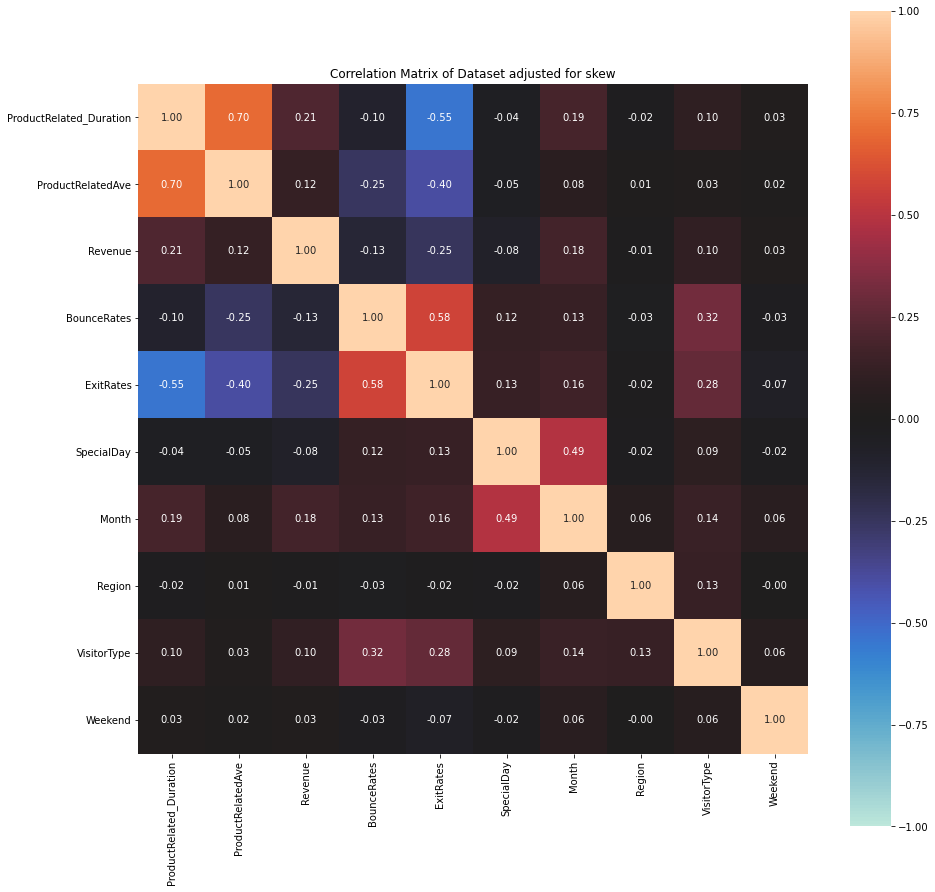

{'corr':                          ProductRelated_Duration  ProductRelatedAve   Revenue  \
 ProductRelated_Duration                 1.000000           0.702991  0.212990   
 ProductRelatedAve                       0.702991           1.000000  0.122492   
 Revenue                                 0.212990           0.122492  1.000000   
 BounceRates                            -0.095738          -0.251167 -0.132895   
 ExitRates                              -0.545800          -0.395803 -0.246644   
 SpecialDay                             -0.040350          -0.046628 -0.082305   
 Month                                   0.186769           0.076650  0.176690   
 Region                                 -0.018304           0.008179 -0.011595   
 VisitorType                             0.101352           0.025731  0.104735   
 Weekend                                 0.030242           0.015154  0.029295   
 
                          BounceRates  ExitRates  SpecialDay     Month  \
 ProductRelate

In [278]:
associations(horizontal_stack, figsize=(15,15), clustering = True, title = 'Correlation Matrix of Dataset adjusted for skew')

## Common Transformations

In [ ]:
# To be completed - Label Encoding/Factorization

References

Just some cool stuff

#import pandas_profiling as pp
#eda = pp.ProfileReport(df)
#display(eda)

References for intro and learning task

- https://www.statista.com/outlook/dmo/ecommerce/worldwide
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7256375/
-https://www.researchgate.net/publication/340058413_Analysis_of_Different_Predicting_Model_for_Online_Shoppers'_Purchase_Intention_from_Empirical_Data

Skew 

https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

Outliers 

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

https://cxl.com/blog/outliers/

Correlation 

http://shakedzy.xyz/dython/modules/data_utils/

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a